In [1]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
kaggle.json
chmod: cannot access '/root/.kaggle/kaggle.json': Permission denied


In [3]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip

... resuming from 111149056 bytes (117338549 bytes left) ...
100%|█████████████████████████████████████████| 218M/218M [05:03<00:00, 883kB/s]
100%|█████████████████████████████████████████| 218M/218M [05:03<00:00, 387kB/s]
Archive:  cat-and-dog.zip
  inflating: test_set/test_set/cats/_DS_Store  
  inflating: test_set/test_set/cats/cat.4001.jpg  
  inflating: test_set/test_set/cats/cat.4002.jpg  
  inflating: test_set/test_set/cats/cat.4003.jpg  
  inflating: test_set/test_set/cats/cat.4004.jpg  
  inflating: test_set/test_set/cats/cat.4005.jpg  
  inflating: test_set/test_set/cats/cat.4006.jpg  
  inflating: test_set/test_set/cats/cat.4007.jpg  
  inflating: test_set/test_set/cats/cat.4008.jpg  
  inflating: test_set/test_set/cats/cat.4009.jpg  
  inflating: test_set/test_set/cats/cat.4010.jpg  
  inflating: test_set/test_set/cats/cat.4011.jpg  
  inflating: test_set/test_set/cats/cat.4012.jpg  
  inflating: test_set/test_set/cats/cat.4013.jpg  
  inflating: test_set/test_set/cats/cat.

  inflating: test_set/test_set/cats/cat.4195.jpg  
  inflating: test_set/test_set/cats/cat.4196.jpg  
  inflating: test_set/test_set/cats/cat.4197.jpg  
  inflating: test_set/test_set/cats/cat.4198.jpg  
  inflating: test_set/test_set/cats/cat.4199.jpg  
  inflating: test_set/test_set/cats/cat.4200.jpg  
  inflating: test_set/test_set/cats/cat.4201.jpg  
  inflating: test_set/test_set/cats/cat.4202.jpg  
  inflating: test_set/test_set/cats/cat.4203.jpg  
  inflating: test_set/test_set/cats/cat.4204.jpg  
  inflating: test_set/test_set/cats/cat.4205.jpg  
  inflating: test_set/test_set/cats/cat.4206.jpg  
  inflating: test_set/test_set/cats/cat.4207.jpg  
  inflating: test_set/test_set/cats/cat.4208.jpg  
  inflating: test_set/test_set/cats/cat.4209.jpg  
  inflating: test_set/test_set/cats/cat.4210.jpg  
  inflating: test_set/test_set/cats/cat.4211.jpg  
  inflating: test_set/test_set/cats/cat.4212.jpg  
  inflating: test_set/test_set/cats/cat.4213.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/cats/cat.4371.jpg  
  inflating: test_set/test_set/cats/cat.4372.jpg  
  inflating: test_set/test_set/cats/cat.4373.jpg  
  inflating: test_set/test_set/cats/cat.4374.jpg  
  inflating: test_set/test_set/cats/cat.4375.jpg  
  inflating: test_set/test_set/cats/cat.4376.jpg  
  inflating: test_set/test_set/cats/cat.4377.jpg  
  inflating: test_set/test_set/cats/cat.4378.jpg  
  inflating: test_set/test_set/cats/cat.4379.jpg  
  inflating: test_set/test_set/cats/cat.4380.jpg  
  inflating: test_set/test_set/cats/cat.4381.jpg  
  inflating: test_set/test_set/cats/cat.4382.jpg  
  inflating: test_set/test_set/cats/cat.4383.jpg  
  inflating: test_set/test_set/cats/cat.4384.jpg  
  inflating: test_set/test_set/cats/cat.4385.jpg  
  inflating: test_set/test_set/cats/cat.4386.jpg  
  inflating: test_set/test_set/cats/cat.4387.jpg  
  inflating: test_set/test_set/cats/cat.4388.jpg  
  inflating: test_set/test_set/cats/cat.4389.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/cats/cat.4540.jpg  
  inflating: test_set/test_set/cats/cat.4541.jpg  
  inflating: test_set/test_set/cats/cat.4542.jpg  
  inflating: test_set/test_set/cats/cat.4543.jpg  
  inflating: test_set/test_set/cats/cat.4544.jpg  
  inflating: test_set/test_set/cats/cat.4545.jpg  
  inflating: test_set/test_set/cats/cat.4546.jpg  
  inflating: test_set/test_set/cats/cat.4547.jpg  
  inflating: test_set/test_set/cats/cat.4548.jpg  
  inflating: test_set/test_set/cats/cat.4549.jpg  
  inflating: test_set/test_set/cats/cat.4550.jpg  
  inflating: test_set/test_set/cats/cat.4551.jpg  
  inflating: test_set/test_set/cats/cat.4552.jpg  
  inflating: test_set/test_set/cats/cat.4553.jpg  
  inflating: test_set/test_set/cats/cat.4554.jpg  
  inflating: test_set/test_set/cats/cat.4555.jpg  
  inflating: test_set/test_set/cats/cat.4556.jpg  
  inflating: test_set/test_set/cats/cat.4557.jpg  
  inflating: test_set/test_set/cats/cat.4558.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/cats/cat.4707.jpg  
  inflating: test_set/test_set/cats/cat.4708.jpg  
  inflating: test_set/test_set/cats/cat.4709.jpg  
  inflating: test_set/test_set/cats/cat.4710.jpg  
  inflating: test_set/test_set/cats/cat.4711.jpg  
  inflating: test_set/test_set/cats/cat.4712.jpg  
  inflating: test_set/test_set/cats/cat.4713.jpg  
  inflating: test_set/test_set/cats/cat.4714.jpg  
  inflating: test_set/test_set/cats/cat.4715.jpg  
  inflating: test_set/test_set/cats/cat.4716.jpg  
  inflating: test_set/test_set/cats/cat.4717.jpg  
  inflating: test_set/test_set/cats/cat.4718.jpg  
  inflating: test_set/test_set/cats/cat.4719.jpg  
  inflating: test_set/test_set/cats/cat.4720.jpg  
  inflating: test_set/test_set/cats/cat.4721.jpg  
  inflating: test_set/test_set/cats/cat.4722.jpg  
  inflating: test_set/test_set/cats/cat.4723.jpg  
  inflating: test_set/test_set/cats/cat.4724.jpg  
  inflating: test_set/test_set/cats/cat.4725.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/cats/cat.4871.jpg  
  inflating: test_set/test_set/cats/cat.4872.jpg  
  inflating: test_set/test_set/cats/cat.4873.jpg  
  inflating: test_set/test_set/cats/cat.4874.jpg  
  inflating: test_set/test_set/cats/cat.4875.jpg  
  inflating: test_set/test_set/cats/cat.4876.jpg  
  inflating: test_set/test_set/cats/cat.4877.jpg  
  inflating: test_set/test_set/cats/cat.4878.jpg  
  inflating: test_set/test_set/cats/cat.4879.jpg  
  inflating: test_set/test_set/cats/cat.4880.jpg  
  inflating: test_set/test_set/cats/cat.4881.jpg  
  inflating: test_set/test_set/cats/cat.4882.jpg  
  inflating: test_set/test_set/cats/cat.4883.jpg  
  inflating: test_set/test_set/cats/cat.4884.jpg  
  inflating: test_set/test_set/cats/cat.4885.jpg  
  inflating: test_set/test_set/cats/cat.4886.jpg  
  inflating: test_set/test_set/cats/cat.4887.jpg  
  inflating: test_set/test_set/cats/cat.4888.jpg  
  inflating: test_set/test_set/cats/cat.4889.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/dogs/dog.4031.jpg  
  inflating: test_set/test_set/dogs/dog.4032.jpg  
  inflating: test_set/test_set/dogs/dog.4033.jpg  
  inflating: test_set/test_set/dogs/dog.4034.jpg  
  inflating: test_set/test_set/dogs/dog.4035.jpg  
  inflating: test_set/test_set/dogs/dog.4036.jpg  
  inflating: test_set/test_set/dogs/dog.4037.jpg  
  inflating: test_set/test_set/dogs/dog.4038.jpg  
  inflating: test_set/test_set/dogs/dog.4039.jpg  
  inflating: test_set/test_set/dogs/dog.4040.jpg  
  inflating: test_set/test_set/dogs/dog.4041.jpg  
  inflating: test_set/test_set/dogs/dog.4042.jpg  
  inflating: test_set/test_set/dogs/dog.4043.jpg  
  inflating: test_set/test_set/dogs/dog.4044.jpg  
  inflating: test_set/test_set/dogs/dog.4045.jpg  
  inflating: test_set/test_set/dogs/dog.4046.jpg  
  inflating: test_set/test_set/dogs/dog.4047.jpg  
  inflating: test_set/test_set/dogs/dog.4048.jpg  
  inflating: test_set/test_set/dogs/dog.4049.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/dogs/dog.4187.jpg  
  inflating: test_set/test_set/dogs/dog.4188.jpg  
  inflating: test_set/test_set/dogs/dog.4189.jpg  
  inflating: test_set/test_set/dogs/dog.4190.jpg  
  inflating: test_set/test_set/dogs/dog.4191.jpg  
  inflating: test_set/test_set/dogs/dog.4192.jpg  
  inflating: test_set/test_set/dogs/dog.4193.jpg  
  inflating: test_set/test_set/dogs/dog.4194.jpg  
  inflating: test_set/test_set/dogs/dog.4195.jpg  
  inflating: test_set/test_set/dogs/dog.4196.jpg  
  inflating: test_set/test_set/dogs/dog.4197.jpg  
  inflating: test_set/test_set/dogs/dog.4198.jpg  
  inflating: test_set/test_set/dogs/dog.4199.jpg  
  inflating: test_set/test_set/dogs/dog.4200.jpg  
  inflating: test_set/test_set/dogs/dog.4201.jpg  
  inflating: test_set/test_set/dogs/dog.4202.jpg  
  inflating: test_set/test_set/dogs/dog.4203.jpg  
  inflating: test_set/test_set/dogs/dog.4204.jpg  
  inflating: test_set/test_set/dogs/dog.4205(1).jpg  
  inflating: test_set/test_s

  inflating: test_set/test_set/dogs/dog.4480.jpg  
  inflating: test_set/test_set/dogs/dog.4481.jpg  
  inflating: test_set/test_set/dogs/dog.4482.jpg  
  inflating: test_set/test_set/dogs/dog.4483.jpg  
  inflating: test_set/test_set/dogs/dog.4484.jpg  
  inflating: test_set/test_set/dogs/dog.4485.jpg  
  inflating: test_set/test_set/dogs/dog.4486.jpg  
  inflating: test_set/test_set/dogs/dog.4487.jpg  
  inflating: test_set/test_set/dogs/dog.4488.jpg  
  inflating: test_set/test_set/dogs/dog.4489.jpg  
  inflating: test_set/test_set/dogs/dog.4490.jpg  
  inflating: test_set/test_set/dogs/dog.4491.jpg  
  inflating: test_set/test_set/dogs/dog.4492.jpg  
  inflating: test_set/test_set/dogs/dog.4493.jpg  
  inflating: test_set/test_set/dogs/dog.4494.jpg  
  inflating: test_set/test_set/dogs/dog.4495.jpg  
  inflating: test_set/test_set/dogs/dog.4496.jpg  
  inflating: test_set/test_set/dogs/dog.4497.jpg  
  inflating: test_set/test_set/dogs/dog.4498.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/dogs/dog.4776.jpg  
  inflating: test_set/test_set/dogs/dog.4777.jpg  
  inflating: test_set/test_set/dogs/dog.4778.jpg  
  inflating: test_set/test_set/dogs/dog.4779.jpg  
  inflating: test_set/test_set/dogs/dog.4780.jpg  
  inflating: test_set/test_set/dogs/dog.4781.jpg  
  inflating: test_set/test_set/dogs/dog.4782.jpg  
  inflating: test_set/test_set/dogs/dog.4783.jpg  
  inflating: test_set/test_set/dogs/dog.4784.jpg  
  inflating: test_set/test_set/dogs/dog.4785.jpg  
  inflating: test_set/test_set/dogs/dog.4786.jpg  
  inflating: test_set/test_set/dogs/dog.4787.jpg  
  inflating: test_set/test_set/dogs/dog.4788.jpg  
  inflating: test_set/test_set/dogs/dog.4789.jpg  
  inflating: test_set/test_set/dogs/dog.4790.jpg  
  inflating: test_set/test_set/dogs/dog.4791.jpg  
  inflating: test_set/test_set/dogs/dog.4792.jpg  
  inflating: test_set/test_set/dogs/dog.4793.jpg  
  inflating: test_set/test_set/dogs/dog.4794.jpg  
  inflating: test_set/test_set/

  inflating: training_set/training_set/cats/cat.1076.jpg  
  inflating: training_set/training_set/cats/cat.1077.jpg  
  inflating: training_set/training_set/cats/cat.1078.jpg  
  inflating: training_set/training_set/cats/cat.1079.jpg  
  inflating: training_set/training_set/cats/cat.108.jpg  
  inflating: training_set/training_set/cats/cat.1080.jpg  
  inflating: training_set/training_set/cats/cat.1081.jpg  
  inflating: training_set/training_set/cats/cat.1082.jpg  
  inflating: training_set/training_set/cats/cat.1083.jpg  
  inflating: training_set/training_set/cats/cat.1084.jpg  
  inflating: training_set/training_set/cats/cat.1085.jpg  
  inflating: training_set/training_set/cats/cat.1086.jpg  
  inflating: training_set/training_set/cats/cat.1087.jpg  
  inflating: training_set/training_set/cats/cat.1088.jpg  
  inflating: training_set/training_set/cats/cat.1089.jpg  
  inflating: training_set/training_set/cats/cat.109.jpg  
  inflating: training_set/training_set/cats/cat.1090.jpg  

  inflating: training_set/training_set/cats/cat.1227.jpg  
  inflating: training_set/training_set/cats/cat.1228.jpg  
  inflating: training_set/training_set/cats/cat.1229.jpg  
  inflating: training_set/training_set/cats/cat.123.jpg  
  inflating: training_set/training_set/cats/cat.1230.jpg  
  inflating: training_set/training_set/cats/cat.1231.jpg  
  inflating: training_set/training_set/cats/cat.1232.jpg  
  inflating: training_set/training_set/cats/cat.1233.jpg  
  inflating: training_set/training_set/cats/cat.1234.jpg  
  inflating: training_set/training_set/cats/cat.1235.jpg  
  inflating: training_set/training_set/cats/cat.1236.jpg  
  inflating: training_set/training_set/cats/cat.1237.jpg  
  inflating: training_set/training_set/cats/cat.1238.jpg  
  inflating: training_set/training_set/cats/cat.1239.jpg  
  inflating: training_set/training_set/cats/cat.124.jpg  
  inflating: training_set/training_set/cats/cat.1240.jpg  
  inflating: training_set/training_set/cats/cat.1241.jpg  

  inflating: training_set/training_set/cats/cat.1374.jpg  
  inflating: training_set/training_set/cats/cat.1375.jpg  
  inflating: training_set/training_set/cats/cat.1376.jpg  
  inflating: training_set/training_set/cats/cat.1377.jpg  
  inflating: training_set/training_set/cats/cat.1378.jpg  
  inflating: training_set/training_set/cats/cat.1379.jpg  
  inflating: training_set/training_set/cats/cat.138.jpg  
  inflating: training_set/training_set/cats/cat.1380.jpg  
  inflating: training_set/training_set/cats/cat.1381.jpg  
  inflating: training_set/training_set/cats/cat.1382.jpg  
  inflating: training_set/training_set/cats/cat.1383.jpg  
  inflating: training_set/training_set/cats/cat.1384.jpg  
  inflating: training_set/training_set/cats/cat.1385.jpg  
  inflating: training_set/training_set/cats/cat.1386.jpg  
  inflating: training_set/training_set/cats/cat.1387.jpg  
  inflating: training_set/training_set/cats/cat.1388.jpg  
  inflating: training_set/training_set/cats/cat.1389.jpg 

  inflating: training_set/training_set/cats/cat.1525.jpg  
  inflating: training_set/training_set/cats/cat.1526.jpg  
  inflating: training_set/training_set/cats/cat.1527.jpg  
  inflating: training_set/training_set/cats/cat.1528.jpg  
  inflating: training_set/training_set/cats/cat.1529.jpg  
  inflating: training_set/training_set/cats/cat.153.jpg  
  inflating: training_set/training_set/cats/cat.1530.jpg  
  inflating: training_set/training_set/cats/cat.1531.jpg  
  inflating: training_set/training_set/cats/cat.1532.jpg  
  inflating: training_set/training_set/cats/cat.1533.jpg  
  inflating: training_set/training_set/cats/cat.1534.jpg  
  inflating: training_set/training_set/cats/cat.1535.jpg  
  inflating: training_set/training_set/cats/cat.1536.jpg  
  inflating: training_set/training_set/cats/cat.1537.jpg  
  inflating: training_set/training_set/cats/cat.1538.jpg  
  inflating: training_set/training_set/cats/cat.1539.jpg  
  inflating: training_set/training_set/cats/cat.154.jpg  

  inflating: training_set/training_set/cats/cat.168.jpg  
  inflating: training_set/training_set/cats/cat.1680.jpg  
  inflating: training_set/training_set/cats/cat.1681.jpg  
  inflating: training_set/training_set/cats/cat.1682.jpg  
  inflating: training_set/training_set/cats/cat.1683.jpg  
  inflating: training_set/training_set/cats/cat.1684.jpg  
  inflating: training_set/training_set/cats/cat.1685.jpg  
  inflating: training_set/training_set/cats/cat.1686.jpg  
  inflating: training_set/training_set/cats/cat.1687.jpg  
  inflating: training_set/training_set/cats/cat.1688.jpg  
  inflating: training_set/training_set/cats/cat.1689.jpg  
  inflating: training_set/training_set/cats/cat.169.jpg  
  inflating: training_set/training_set/cats/cat.1690.jpg  
  inflating: training_set/training_set/cats/cat.1691.jpg  
  inflating: training_set/training_set/cats/cat.1692.jpg  
  inflating: training_set/training_set/cats/cat.1693.jpg  
  inflating: training_set/training_set/cats/cat.1694.jpg  

  inflating: training_set/training_set/cats/cat.1832.jpg  
  inflating: training_set/training_set/cats/cat.1833.jpg  
  inflating: training_set/training_set/cats/cat.1834.jpg  
  inflating: training_set/training_set/cats/cat.1835.jpg  
  inflating: training_set/training_set/cats/cat.1836.jpg  
  inflating: training_set/training_set/cats/cat.1837.jpg  
  inflating: training_set/training_set/cats/cat.1838.jpg  
  inflating: training_set/training_set/cats/cat.1839.jpg  
  inflating: training_set/training_set/cats/cat.184.jpg  
  inflating: training_set/training_set/cats/cat.1840.jpg  
  inflating: training_set/training_set/cats/cat.1841.jpg  
  inflating: training_set/training_set/cats/cat.1842.jpg  
  inflating: training_set/training_set/cats/cat.1843.jpg  
  inflating: training_set/training_set/cats/cat.1844.jpg  
  inflating: training_set/training_set/cats/cat.1845.jpg  
  inflating: training_set/training_set/cats/cat.1846.jpg  
  inflating: training_set/training_set/cats/cat.1847.jpg 

  inflating: training_set/training_set/cats/cat.1980.jpg  
  inflating: training_set/training_set/cats/cat.1981.jpg  
  inflating: training_set/training_set/cats/cat.1982.jpg  
  inflating: training_set/training_set/cats/cat.1983.jpg  
  inflating: training_set/training_set/cats/cat.1984.jpg  
  inflating: training_set/training_set/cats/cat.1985.jpg  
  inflating: training_set/training_set/cats/cat.1986.jpg  
  inflating: training_set/training_set/cats/cat.1987.jpg  
  inflating: training_set/training_set/cats/cat.1988.jpg  
  inflating: training_set/training_set/cats/cat.1989.jpg  
  inflating: training_set/training_set/cats/cat.199.jpg  
  inflating: training_set/training_set/cats/cat.1990.jpg  
  inflating: training_set/training_set/cats/cat.1991.jpg  
  inflating: training_set/training_set/cats/cat.1992.jpg  
  inflating: training_set/training_set/cats/cat.1993.jpg  
  inflating: training_set/training_set/cats/cat.1994.jpg  
  inflating: training_set/training_set/cats/cat.1995.jpg 

  inflating: training_set/training_set/cats/cat.2128.jpg  
  inflating: training_set/training_set/cats/cat.2129.jpg  
  inflating: training_set/training_set/cats/cat.213.jpg  
  inflating: training_set/training_set/cats/cat.2130.jpg  
  inflating: training_set/training_set/cats/cat.2131.jpg  
  inflating: training_set/training_set/cats/cat.2132.jpg  
  inflating: training_set/training_set/cats/cat.2133.jpg  
  inflating: training_set/training_set/cats/cat.2134.jpg  
  inflating: training_set/training_set/cats/cat.2135.jpg  
  inflating: training_set/training_set/cats/cat.2136.jpg  
  inflating: training_set/training_set/cats/cat.2137.jpg  
  inflating: training_set/training_set/cats/cat.2138.jpg  
  inflating: training_set/training_set/cats/cat.2139.jpg  
  inflating: training_set/training_set/cats/cat.214.jpg  
  inflating: training_set/training_set/cats/cat.2140.jpg  
  inflating: training_set/training_set/cats/cat.2141.jpg  
  inflating: training_set/training_set/cats/cat.2142.jpg  

  inflating: training_set/training_set/cats/cat.2274.jpg  
  inflating: training_set/training_set/cats/cat.2275.jpg  
  inflating: training_set/training_set/cats/cat.2276.jpg  
  inflating: training_set/training_set/cats/cat.2277.jpg  
  inflating: training_set/training_set/cats/cat.2278.jpg  
  inflating: training_set/training_set/cats/cat.2279.jpg  
  inflating: training_set/training_set/cats/cat.228.jpg  
  inflating: training_set/training_set/cats/cat.2280.jpg  
  inflating: training_set/training_set/cats/cat.2281.jpg  
  inflating: training_set/training_set/cats/cat.2282.jpg  
  inflating: training_set/training_set/cats/cat.2283.jpg  
  inflating: training_set/training_set/cats/cat.2284.jpg  
  inflating: training_set/training_set/cats/cat.2285.jpg  
  inflating: training_set/training_set/cats/cat.2286.jpg  
  inflating: training_set/training_set/cats/cat.2287.jpg  
  inflating: training_set/training_set/cats/cat.2288.jpg  
  inflating: training_set/training_set/cats/cat.2289.jpg 

  inflating: training_set/training_set/cats/cat.2422.jpg  
  inflating: training_set/training_set/cats/cat.2423.jpg  
  inflating: training_set/training_set/cats/cat.2424.jpg  
  inflating: training_set/training_set/cats/cat.2425.jpg  
  inflating: training_set/training_set/cats/cat.2426.jpg  
  inflating: training_set/training_set/cats/cat.2427.jpg  
  inflating: training_set/training_set/cats/cat.2428.jpg  
  inflating: training_set/training_set/cats/cat.2429.jpg  
  inflating: training_set/training_set/cats/cat.243.jpg  
  inflating: training_set/training_set/cats/cat.2430.jpg  
  inflating: training_set/training_set/cats/cat.2431.jpg  
  inflating: training_set/training_set/cats/cat.2432.jpg  
  inflating: training_set/training_set/cats/cat.2433.jpg  
  inflating: training_set/training_set/cats/cat.2434.jpg  
  inflating: training_set/training_set/cats/cat.2435.jpg  
  inflating: training_set/training_set/cats/cat.2436.jpg  
  inflating: training_set/training_set/cats/cat.2437.jpg 

  inflating: training_set/training_set/cats/cat.2581.jpg  
  inflating: training_set/training_set/cats/cat.2582.jpg  
  inflating: training_set/training_set/cats/cat.2583.jpg  
  inflating: training_set/training_set/cats/cat.2584.jpg  
  inflating: training_set/training_set/cats/cat.2585.jpg  
  inflating: training_set/training_set/cats/cat.2586.jpg  
  inflating: training_set/training_set/cats/cat.2587.jpg  
  inflating: training_set/training_set/cats/cat.2588.jpg  
  inflating: training_set/training_set/cats/cat.2589.jpg  
  inflating: training_set/training_set/cats/cat.259.jpg  
  inflating: training_set/training_set/cats/cat.2590.jpg  
  inflating: training_set/training_set/cats/cat.2591.jpg  
  inflating: training_set/training_set/cats/cat.2592.jpg  
  inflating: training_set/training_set/cats/cat.2593.jpg  
  inflating: training_set/training_set/cats/cat.2594.jpg  
  inflating: training_set/training_set/cats/cat.2595.jpg  
  inflating: training_set/training_set/cats/cat.2596.jpg 

  inflating: training_set/training_set/cats/cat.2724.jpg  
  inflating: training_set/training_set/cats/cat.2725.jpg  
  inflating: training_set/training_set/cats/cat.2726.jpg  
  inflating: training_set/training_set/cats/cat.2727.jpg  
  inflating: training_set/training_set/cats/cat.2728.jpg  
  inflating: training_set/training_set/cats/cat.2729.jpg  
  inflating: training_set/training_set/cats/cat.273.jpg  
  inflating: training_set/training_set/cats/cat.2730.jpg  
  inflating: training_set/training_set/cats/cat.2731.jpg  
  inflating: training_set/training_set/cats/cat.2732.jpg  
  inflating: training_set/training_set/cats/cat.2733.jpg  
  inflating: training_set/training_set/cats/cat.2734.jpg  
  inflating: training_set/training_set/cats/cat.2735.jpg  
  inflating: training_set/training_set/cats/cat.2736.jpg  
  inflating: training_set/training_set/cats/cat.2737.jpg  
  inflating: training_set/training_set/cats/cat.2738.jpg  
  inflating: training_set/training_set/cats/cat.2739.jpg 

  inflating: training_set/training_set/cats/cat.2875.jpg  
  inflating: training_set/training_set/cats/cat.2876.jpg  
  inflating: training_set/training_set/cats/cat.2877.jpg  
  inflating: training_set/training_set/cats/cat.2878.jpg  
  inflating: training_set/training_set/cats/cat.2879.jpg  
  inflating: training_set/training_set/cats/cat.288.jpg  
  inflating: training_set/training_set/cats/cat.2880.jpg  
  inflating: training_set/training_set/cats/cat.2881.jpg  
  inflating: training_set/training_set/cats/cat.2882.jpg  
  inflating: training_set/training_set/cats/cat.2883.jpg  
  inflating: training_set/training_set/cats/cat.2884.jpg  
  inflating: training_set/training_set/cats/cat.2885.jpg  
  inflating: training_set/training_set/cats/cat.2886.jpg  
  inflating: training_set/training_set/cats/cat.2887.jpg  
  inflating: training_set/training_set/cats/cat.2888.jpg  
  inflating: training_set/training_set/cats/cat.2889.jpg  
  inflating: training_set/training_set/cats/cat.289.jpg  

  inflating: training_set/training_set/cats/cat.3014.jpg  
  inflating: training_set/training_set/cats/cat.3015.jpg  
  inflating: training_set/training_set/cats/cat.3016.jpg  
  inflating: training_set/training_set/cats/cat.3017.jpg  
  inflating: training_set/training_set/cats/cat.3018.jpg  
  inflating: training_set/training_set/cats/cat.3019.jpg  
  inflating: training_set/training_set/cats/cat.302.jpg  
  inflating: training_set/training_set/cats/cat.3020.jpg  
  inflating: training_set/training_set/cats/cat.3021.jpg  
  inflating: training_set/training_set/cats/cat.3022.jpg  
  inflating: training_set/training_set/cats/cat.3023.jpg  
  inflating: training_set/training_set/cats/cat.3024.jpg  
  inflating: training_set/training_set/cats/cat.3025.jpg  
  inflating: training_set/training_set/cats/cat.3026.jpg  
  inflating: training_set/training_set/cats/cat.3027.jpg  
  inflating: training_set/training_set/cats/cat.3028.jpg  
  inflating: training_set/training_set/cats/cat.3029.jpg 

  inflating: training_set/training_set/cats/cat.3156.jpg  
  inflating: training_set/training_set/cats/cat.3157.jpg  
  inflating: training_set/training_set/cats/cat.3158.jpg  
  inflating: training_set/training_set/cats/cat.3159.jpg  
  inflating: training_set/training_set/cats/cat.316.jpg  
  inflating: training_set/training_set/cats/cat.3160.jpg  
  inflating: training_set/training_set/cats/cat.3161.jpg  
  inflating: training_set/training_set/cats/cat.3162.jpg  
  inflating: training_set/training_set/cats/cat.3163.jpg  
  inflating: training_set/training_set/cats/cat.3164.jpg  
  inflating: training_set/training_set/cats/cat.3165.jpg  
  inflating: training_set/training_set/cats/cat.3166.jpg  
  inflating: training_set/training_set/cats/cat.3167.jpg  
  inflating: training_set/training_set/cats/cat.3168.jpg  
  inflating: training_set/training_set/cats/cat.3169.jpg  
  inflating: training_set/training_set/cats/cat.317.jpg  
  inflating: training_set/training_set/cats/cat.3170.jpg  

  inflating: training_set/training_set/cats/cat.3303.jpg  
  inflating: training_set/training_set/cats/cat.3304.jpg  
  inflating: training_set/training_set/cats/cat.3305.jpg  
  inflating: training_set/training_set/cats/cat.3306.jpg  
  inflating: training_set/training_set/cats/cat.3307.jpg  
  inflating: training_set/training_set/cats/cat.3308.jpg  
  inflating: training_set/training_set/cats/cat.3309.jpg  
  inflating: training_set/training_set/cats/cat.331.jpg  
  inflating: training_set/training_set/cats/cat.3310.jpg  
  inflating: training_set/training_set/cats/cat.3311.jpg  
  inflating: training_set/training_set/cats/cat.3312.jpg  
  inflating: training_set/training_set/cats/cat.3313.jpg  
  inflating: training_set/training_set/cats/cat.3314.jpg  
  inflating: training_set/training_set/cats/cat.3315.jpg  
  inflating: training_set/training_set/cats/cat.3316.jpg  
  inflating: training_set/training_set/cats/cat.3317.jpg  
  inflating: training_set/training_set/cats/cat.3318.jpg 

  inflating: training_set/training_set/cats/cat.3452.jpg  
  inflating: training_set/training_set/cats/cat.3453.jpg  
  inflating: training_set/training_set/cats/cat.3454.jpg  
  inflating: training_set/training_set/cats/cat.3455.jpg  
  inflating: training_set/training_set/cats/cat.3456.jpg  
  inflating: training_set/training_set/cats/cat.3457.jpg  
  inflating: training_set/training_set/cats/cat.3458.jpg  
  inflating: training_set/training_set/cats/cat.3459.jpg  
  inflating: training_set/training_set/cats/cat.346.jpg  
  inflating: training_set/training_set/cats/cat.3460.jpg  
  inflating: training_set/training_set/cats/cat.3461.jpg  
  inflating: training_set/training_set/cats/cat.3462.jpg  
  inflating: training_set/training_set/cats/cat.3463.jpg  
  inflating: training_set/training_set/cats/cat.3464.jpg  
  inflating: training_set/training_set/cats/cat.3465.jpg  
  inflating: training_set/training_set/cats/cat.3466.jpg  
  inflating: training_set/training_set/cats/cat.3467.jpg 

  inflating: training_set/training_set/cats/cat.36.jpg  
  inflating: training_set/training_set/cats/cat.360.jpg  
  inflating: training_set/training_set/cats/cat.3600.jpg  
  inflating: training_set/training_set/cats/cat.3601.jpg  
  inflating: training_set/training_set/cats/cat.3602.jpg  
  inflating: training_set/training_set/cats/cat.3603.jpg  
  inflating: training_set/training_set/cats/cat.3604.jpg  
  inflating: training_set/training_set/cats/cat.3605.jpg  
  inflating: training_set/training_set/cats/cat.3606.jpg  
  inflating: training_set/training_set/cats/cat.3607.jpg  
  inflating: training_set/training_set/cats/cat.3608.jpg  
  inflating: training_set/training_set/cats/cat.3609.jpg  
  inflating: training_set/training_set/cats/cat.361.jpg  
  inflating: training_set/training_set/cats/cat.3610.jpg  
  inflating: training_set/training_set/cats/cat.3611.jpg  
  inflating: training_set/training_set/cats/cat.3612.jpg  
  inflating: training_set/training_set/cats/cat.3613.jpg  
 

  inflating: training_set/training_set/cats/cat.3750.jpg  
  inflating: training_set/training_set/cats/cat.3751.jpg  
  inflating: training_set/training_set/cats/cat.3752.jpg  
  inflating: training_set/training_set/cats/cat.3753.jpg  
  inflating: training_set/training_set/cats/cat.3754.jpg  
  inflating: training_set/training_set/cats/cat.3755.jpg  
  inflating: training_set/training_set/cats/cat.3756.jpg  
  inflating: training_set/training_set/cats/cat.3757.jpg  
  inflating: training_set/training_set/cats/cat.3758.jpg  
  inflating: training_set/training_set/cats/cat.3759.jpg  
  inflating: training_set/training_set/cats/cat.376.jpg  
  inflating: training_set/training_set/cats/cat.3760.jpg  
  inflating: training_set/training_set/cats/cat.3761.jpg  
  inflating: training_set/training_set/cats/cat.3762.jpg  
  inflating: training_set/training_set/cats/cat.3763.jpg  
  inflating: training_set/training_set/cats/cat.3764.jpg  
  inflating: training_set/training_set/cats/cat.3765.jpg 

  inflating: training_set/training_set/cats/cat.3910.jpg  
  inflating: training_set/training_set/cats/cat.3911.jpg  
  inflating: training_set/training_set/cats/cat.3912.jpg  
  inflating: training_set/training_set/cats/cat.3913.jpg  
  inflating: training_set/training_set/cats/cat.3914.jpg  
  inflating: training_set/training_set/cats/cat.3915.jpg  
  inflating: training_set/training_set/cats/cat.3916.jpg  
  inflating: training_set/training_set/cats/cat.3917.jpg  
  inflating: training_set/training_set/cats/cat.3918.jpg  
  inflating: training_set/training_set/cats/cat.3919.jpg  
  inflating: training_set/training_set/cats/cat.392.jpg  
  inflating: training_set/training_set/cats/cat.3920.jpg  
  inflating: training_set/training_set/cats/cat.3921.jpg  
  inflating: training_set/training_set/cats/cat.3922.jpg  
  inflating: training_set/training_set/cats/cat.3923.jpg  
  inflating: training_set/training_set/cats/cat.3924.jpg  
  inflating: training_set/training_set/cats/cat.3925.jpg 

  inflating: training_set/training_set/cats/cat.455.jpg  
  inflating: training_set/training_set/cats/cat.456.jpg  
  inflating: training_set/training_set/cats/cat.457.jpg  
  inflating: training_set/training_set/cats/cat.458.jpg  
  inflating: training_set/training_set/cats/cat.459.jpg  
  inflating: training_set/training_set/cats/cat.46.jpg  
  inflating: training_set/training_set/cats/cat.460.jpg  
  inflating: training_set/training_set/cats/cat.461.jpg  
  inflating: training_set/training_set/cats/cat.462.jpg  
  inflating: training_set/training_set/cats/cat.463.jpg  
  inflating: training_set/training_set/cats/cat.464.jpg  
  inflating: training_set/training_set/cats/cat.465.jpg  
  inflating: training_set/training_set/cats/cat.466.jpg  
  inflating: training_set/training_set/cats/cat.467.jpg  
  inflating: training_set/training_set/cats/cat.468.jpg  
  inflating: training_set/training_set/cats/cat.469.jpg  
  inflating: training_set/training_set/cats/cat.47.jpg  
  inflating: tra

  inflating: training_set/training_set/cats/cat.609.jpg  
  inflating: training_set/training_set/cats/cat.61.jpg  
  inflating: training_set/training_set/cats/cat.610.jpg  
  inflating: training_set/training_set/cats/cat.611.jpg  
  inflating: training_set/training_set/cats/cat.612.jpg  
  inflating: training_set/training_set/cats/cat.613.jpg  
  inflating: training_set/training_set/cats/cat.614.jpg  
  inflating: training_set/training_set/cats/cat.615.jpg  
  inflating: training_set/training_set/cats/cat.616.jpg  
  inflating: training_set/training_set/cats/cat.617.jpg  
  inflating: training_set/training_set/cats/cat.618.jpg  
  inflating: training_set/training_set/cats/cat.619.jpg  
  inflating: training_set/training_set/cats/cat.62.jpg  
  inflating: training_set/training_set/cats/cat.620.jpg  
  inflating: training_set/training_set/cats/cat.621.jpg  
  inflating: training_set/training_set/cats/cat.622.jpg  
  inflating: training_set/training_set/cats/cat.623.jpg  
  inflating: tra

  inflating: training_set/training_set/cats/cat.765.jpg  
  inflating: training_set/training_set/cats/cat.766.jpg  
  inflating: training_set/training_set/cats/cat.767.jpg  
  inflating: training_set/training_set/cats/cat.768.jpg  
  inflating: training_set/training_set/cats/cat.769.jpg  
  inflating: training_set/training_set/cats/cat.77.jpg  
  inflating: training_set/training_set/cats/cat.770.jpg  
  inflating: training_set/training_set/cats/cat.771.jpg  
  inflating: training_set/training_set/cats/cat.772.jpg  
  inflating: training_set/training_set/cats/cat.773.jpg  
  inflating: training_set/training_set/cats/cat.774.jpg  
  inflating: training_set/training_set/cats/cat.775.jpg  
  inflating: training_set/training_set/cats/cat.776.jpg  
  inflating: training_set/training_set/cats/cat.777.jpg  
  inflating: training_set/training_set/cats/cat.778.jpg  
  inflating: training_set/training_set/cats/cat.779.jpg  
  inflating: training_set/training_set/cats/cat.78.jpg  
  inflating: tra

  inflating: training_set/training_set/cats/cat.911.jpg  
  inflating: training_set/training_set/cats/cat.912.jpg  
  inflating: training_set/training_set/cats/cat.913.jpg  
  inflating: training_set/training_set/cats/cat.914.jpg  
  inflating: training_set/training_set/cats/cat.915.jpg  
  inflating: training_set/training_set/cats/cat.916.jpg  
  inflating: training_set/training_set/cats/cat.917.jpg  
  inflating: training_set/training_set/cats/cat.918.jpg  
  inflating: training_set/training_set/cats/cat.919.jpg  
  inflating: training_set/training_set/cats/cat.92.jpg  
  inflating: training_set/training_set/cats/cat.920.jpg  
  inflating: training_set/training_set/cats/cat.921.jpg  
  inflating: training_set/training_set/cats/cat.922.jpg  
  inflating: training_set/training_set/cats/cat.923.jpg  
  inflating: training_set/training_set/cats/cat.924.jpg  
  inflating: training_set/training_set/cats/cat.925.jpg  
  inflating: training_set/training_set/cats/cat.926.jpg  
  inflating: tr

  inflating: training_set/training_set/dogs/dog.1064.jpg  
  inflating: training_set/training_set/dogs/dog.1065.jpg  
  inflating: training_set/training_set/dogs/dog.1066.jpg  
  inflating: training_set/training_set/dogs/dog.1067.jpg  
  inflating: training_set/training_set/dogs/dog.1068.jpg  
  inflating: training_set/training_set/dogs/dog.1069.jpg  
  inflating: training_set/training_set/dogs/dog.107.jpg  
  inflating: training_set/training_set/dogs/dog.1070.jpg  
  inflating: training_set/training_set/dogs/dog.1071.jpg  
  inflating: training_set/training_set/dogs/dog.1072.jpg  
  inflating: training_set/training_set/dogs/dog.1073.jpg  
  inflating: training_set/training_set/dogs/dog.1074.jpg  
  inflating: training_set/training_set/dogs/dog.1075.jpg  
  inflating: training_set/training_set/dogs/dog.1076.jpg  
  inflating: training_set/training_set/dogs/dog.1077.jpg  
  inflating: training_set/training_set/dogs/dog.1078.jpg  
  inflating: training_set/training_set/dogs/dog.1079.jpg 

  inflating: training_set/training_set/dogs/dog.1195.jpg  
  inflating: training_set/training_set/dogs/dog.1196.jpg  
  inflating: training_set/training_set/dogs/dog.1197.jpg  
  inflating: training_set/training_set/dogs/dog.1198.jpg  
  inflating: training_set/training_set/dogs/dog.1199.jpg  
  inflating: training_set/training_set/dogs/dog.12.jpg  
  inflating: training_set/training_set/dogs/dog.120.jpg  
  inflating: training_set/training_set/dogs/dog.1200.jpg  
  inflating: training_set/training_set/dogs/dog.1201.jpg  
  inflating: training_set/training_set/dogs/dog.1202.jpg  
  inflating: training_set/training_set/dogs/dog.1203.jpg  
  inflating: training_set/training_set/dogs/dog.1204.jpg  
  inflating: training_set/training_set/dogs/dog.1205.jpg  
  inflating: training_set/training_set/dogs/dog.1206.jpg  
  inflating: training_set/training_set/dogs/dog.1207.jpg  
  inflating: training_set/training_set/dogs/dog.1208.jpg  
  inflating: training_set/training_set/dogs/dog.1209.jpg  


  inflating: training_set/training_set/dogs/dog.1341.jpg  
  inflating: training_set/training_set/dogs/dog.1342.jpg  
  inflating: training_set/training_set/dogs/dog.1343.jpg  
  inflating: training_set/training_set/dogs/dog.1344.jpg  
  inflating: training_set/training_set/dogs/dog.1345.jpg  
  inflating: training_set/training_set/dogs/dog.1346.jpg  
  inflating: training_set/training_set/dogs/dog.1347.jpg  
  inflating: training_set/training_set/dogs/dog.1348.jpg  
  inflating: training_set/training_set/dogs/dog.1349.jpg  
  inflating: training_set/training_set/dogs/dog.135.jpg  
  inflating: training_set/training_set/dogs/dog.1350.jpg  
  inflating: training_set/training_set/dogs/dog.1351.jpg  
  inflating: training_set/training_set/dogs/dog.1352.jpg  
  inflating: training_set/training_set/dogs/dog.1353.jpg  
  inflating: training_set/training_set/dogs/dog.1354.jpg  
  inflating: training_set/training_set/dogs/dog.1355.jpg  
  inflating: training_set/training_set/dogs/dog.1356.jpg 

  inflating: training_set/training_set/dogs/dog.1478.jpg  
  inflating: training_set/training_set/dogs/dog.1479.jpg  
  inflating: training_set/training_set/dogs/dog.148.jpg  
  inflating: training_set/training_set/dogs/dog.1480.jpg  
  inflating: training_set/training_set/dogs/dog.1481.jpg  
  inflating: training_set/training_set/dogs/dog.1482.jpg  
  inflating: training_set/training_set/dogs/dog.1483.jpg  
  inflating: training_set/training_set/dogs/dog.1484.jpg  
  inflating: training_set/training_set/dogs/dog.1485.jpg  
  inflating: training_set/training_set/dogs/dog.1486.jpg  
  inflating: training_set/training_set/dogs/dog.1487.jpg  
  inflating: training_set/training_set/dogs/dog.1488.jpg  
  inflating: training_set/training_set/dogs/dog.1489.jpg  
  inflating: training_set/training_set/dogs/dog.149.jpg  
  inflating: training_set/training_set/dogs/dog.1490.jpg  
  inflating: training_set/training_set/dogs/dog.1491.jpg  
  inflating: training_set/training_set/dogs/dog.1492.jpg  

  inflating: training_set/training_set/dogs/dog.1622.jpg  
  inflating: training_set/training_set/dogs/dog.1623.jpg  
  inflating: training_set/training_set/dogs/dog.1624.jpg  
  inflating: training_set/training_set/dogs/dog.1625.jpg  
  inflating: training_set/training_set/dogs/dog.1626.jpg  
  inflating: training_set/training_set/dogs/dog.1627.jpg  
  inflating: training_set/training_set/dogs/dog.1628.jpg  
  inflating: training_set/training_set/dogs/dog.1629.jpg  
  inflating: training_set/training_set/dogs/dog.163.jpg  
  inflating: training_set/training_set/dogs/dog.1630.jpg  
  inflating: training_set/training_set/dogs/dog.1631.jpg  
  inflating: training_set/training_set/dogs/dog.1632.jpg  
  inflating: training_set/training_set/dogs/dog.1633.jpg  
  inflating: training_set/training_set/dogs/dog.1634.jpg  
  inflating: training_set/training_set/dogs/dog.1635.jpg  
  inflating: training_set/training_set/dogs/dog.1636.jpg  
  inflating: training_set/training_set/dogs/dog.1637.jpg 

  inflating: training_set/training_set/dogs/dog.1769.jpg  
  inflating: training_set/training_set/dogs/dog.177.jpg  
  inflating: training_set/training_set/dogs/dog.1770.jpg  
  inflating: training_set/training_set/dogs/dog.1771.jpg  
  inflating: training_set/training_set/dogs/dog.1772.jpg  
  inflating: training_set/training_set/dogs/dog.1773.jpg  
  inflating: training_set/training_set/dogs/dog.1774.jpg  
  inflating: training_set/training_set/dogs/dog.1775.jpg  
  inflating: training_set/training_set/dogs/dog.1776.jpg  
  inflating: training_set/training_set/dogs/dog.1777.jpg  
  inflating: training_set/training_set/dogs/dog.1778.jpg  
  inflating: training_set/training_set/dogs/dog.1779.jpg  
  inflating: training_set/training_set/dogs/dog.178.jpg  
  inflating: training_set/training_set/dogs/dog.1780.jpg  
  inflating: training_set/training_set/dogs/dog.1781.jpg  
  inflating: training_set/training_set/dogs/dog.1782.jpg  
  inflating: training_set/training_set/dogs/dog.1783.jpg  

  inflating: training_set/training_set/dogs/dog.1907.jpg  
  inflating: training_set/training_set/dogs/dog.1908.jpg  
  inflating: training_set/training_set/dogs/dog.1909.jpg  
  inflating: training_set/training_set/dogs/dog.191.jpg  
  inflating: training_set/training_set/dogs/dog.1910.jpg  
  inflating: training_set/training_set/dogs/dog.1911.jpg  
  inflating: training_set/training_set/dogs/dog.1912.jpg  
  inflating: training_set/training_set/dogs/dog.1913.jpg  
  inflating: training_set/training_set/dogs/dog.1914.jpg  
  inflating: training_set/training_set/dogs/dog.1915.jpg  
  inflating: training_set/training_set/dogs/dog.1916.jpg  
  inflating: training_set/training_set/dogs/dog.1917.jpg  
  inflating: training_set/training_set/dogs/dog.1918.jpg  
  inflating: training_set/training_set/dogs/dog.1919.jpg  
  inflating: training_set/training_set/dogs/dog.192.jpg  
  inflating: training_set/training_set/dogs/dog.1920.jpg  
  inflating: training_set/training_set/dogs/dog.1921.jpg  

  inflating: training_set/training_set/dogs/dog.2051.jpg  
  inflating: training_set/training_set/dogs/dog.2052.jpg  
  inflating: training_set/training_set/dogs/dog.2053.jpg  
  inflating: training_set/training_set/dogs/dog.2054.jpg  
  inflating: training_set/training_set/dogs/dog.2055.jpg  
  inflating: training_set/training_set/dogs/dog.2056.jpg  
  inflating: training_set/training_set/dogs/dog.2057.jpg  
  inflating: training_set/training_set/dogs/dog.2058.jpg  
  inflating: training_set/training_set/dogs/dog.2059.jpg  
  inflating: training_set/training_set/dogs/dog.206.jpg  
  inflating: training_set/training_set/dogs/dog.2060.jpg  
  inflating: training_set/training_set/dogs/dog.2061.jpg  
  inflating: training_set/training_set/dogs/dog.2062.jpg  
  inflating: training_set/training_set/dogs/dog.2063.jpg  
  inflating: training_set/training_set/dogs/dog.2064.jpg  
  inflating: training_set/training_set/dogs/dog.2065.jpg  
  inflating: training_set/training_set/dogs/dog.2066.jpg 

  inflating: training_set/training_set/dogs/dog.2187.jpg  
  inflating: training_set/training_set/dogs/dog.2188.jpg  
  inflating: training_set/training_set/dogs/dog.2189.jpg  
  inflating: training_set/training_set/dogs/dog.219.jpg  
  inflating: training_set/training_set/dogs/dog.2190.jpg  
  inflating: training_set/training_set/dogs/dog.2191.jpg  
  inflating: training_set/training_set/dogs/dog.2192.jpg  
  inflating: training_set/training_set/dogs/dog.2193.jpg  
  inflating: training_set/training_set/dogs/dog.2194.jpg  
  inflating: training_set/training_set/dogs/dog.2195.jpg  
  inflating: training_set/training_set/dogs/dog.2196.jpg  
  inflating: training_set/training_set/dogs/dog.2197.jpg  
  inflating: training_set/training_set/dogs/dog.2198.jpg  
  inflating: training_set/training_set/dogs/dog.2199.jpg  
  inflating: training_set/training_set/dogs/dog.22.jpg  
  inflating: training_set/training_set/dogs/dog.220.jpg  
  inflating: training_set/training_set/dogs/dog.2200.jpg  
 

  inflating: training_set/training_set/dogs/dog.2317.jpg  
  inflating: training_set/training_set/dogs/dog.2318.jpg  
  inflating: training_set/training_set/dogs/dog.2319.jpg  
  inflating: training_set/training_set/dogs/dog.232.jpg  
  inflating: training_set/training_set/dogs/dog.2320.jpg  
  inflating: training_set/training_set/dogs/dog.2321.jpg  
  inflating: training_set/training_set/dogs/dog.2322.jpg  
  inflating: training_set/training_set/dogs/dog.2323.jpg  
  inflating: training_set/training_set/dogs/dog.2324.jpg  
  inflating: training_set/training_set/dogs/dog.2325.jpg  
  inflating: training_set/training_set/dogs/dog.2326.jpg  
  inflating: training_set/training_set/dogs/dog.2327.jpg  
  inflating: training_set/training_set/dogs/dog.2328.jpg  
  inflating: training_set/training_set/dogs/dog.2329.jpg  
  inflating: training_set/training_set/dogs/dog.233.jpg  
  inflating: training_set/training_set/dogs/dog.2330.jpg  
  inflating: training_set/training_set/dogs/dog.2331.jpg  

  inflating: training_set/training_set/dogs/dog.2453.jpg  
  inflating: training_set/training_set/dogs/dog.2454.jpg  
  inflating: training_set/training_set/dogs/dog.2455.jpg  
  inflating: training_set/training_set/dogs/dog.2456.jpg  
  inflating: training_set/training_set/dogs/dog.2457.jpg  
  inflating: training_set/training_set/dogs/dog.2458.jpg  
  inflating: training_set/training_set/dogs/dog.2459.jpg  
  inflating: training_set/training_set/dogs/dog.246.jpg  
  inflating: training_set/training_set/dogs/dog.2460.jpg  
  inflating: training_set/training_set/dogs/dog.2461.jpg  
  inflating: training_set/training_set/dogs/dog.2462.jpg  
  inflating: training_set/training_set/dogs/dog.2463.jpg  
  inflating: training_set/training_set/dogs/dog.2464.jpg  
  inflating: training_set/training_set/dogs/dog.2465.jpg  
  inflating: training_set/training_set/dogs/dog.2466.jpg  
  inflating: training_set/training_set/dogs/dog.2467.jpg  
  inflating: training_set/training_set/dogs/dog.2468.jpg 

  inflating: training_set/training_set/dogs/dog.2594.jpg  
  inflating: training_set/training_set/dogs/dog.2595.jpg  
  inflating: training_set/training_set/dogs/dog.2596.jpg  
  inflating: training_set/training_set/dogs/dog.2597.jpg  
  inflating: training_set/training_set/dogs/dog.2598.jpg  
  inflating: training_set/training_set/dogs/dog.2599.jpg  
  inflating: training_set/training_set/dogs/dog.26.jpg  
  inflating: training_set/training_set/dogs/dog.260.jpg  
  inflating: training_set/training_set/dogs/dog.2600.jpg  
  inflating: training_set/training_set/dogs/dog.2601.jpg  
  inflating: training_set/training_set/dogs/dog.2602.jpg  
  inflating: training_set/training_set/dogs/dog.2603.jpg  
  inflating: training_set/training_set/dogs/dog.2604.jpg  
  inflating: training_set/training_set/dogs/dog.2605.jpg  
  inflating: training_set/training_set/dogs/dog.2606.jpg  
  inflating: training_set/training_set/dogs/dog.2607.jpg  
  inflating: training_set/training_set/dogs/dog.2608.jpg  


  inflating: training_set/training_set/dogs/dog.2732.jpg  
  inflating: training_set/training_set/dogs/dog.2733.jpg  
  inflating: training_set/training_set/dogs/dog.2734.jpg  
  inflating: training_set/training_set/dogs/dog.2735.jpg  
  inflating: training_set/training_set/dogs/dog.2736.jpg  
  inflating: training_set/training_set/dogs/dog.2737.jpg  
  inflating: training_set/training_set/dogs/dog.2738.jpg  
  inflating: training_set/training_set/dogs/dog.2739.jpg  
  inflating: training_set/training_set/dogs/dog.274.jpg  
  inflating: training_set/training_set/dogs/dog.2740.jpg  
  inflating: training_set/training_set/dogs/dog.2741.jpg  
  inflating: training_set/training_set/dogs/dog.2742.jpg  
  inflating: training_set/training_set/dogs/dog.2743.jpg  
  inflating: training_set/training_set/dogs/dog.2744.jpg  
  inflating: training_set/training_set/dogs/dog.2745.jpg  
  inflating: training_set/training_set/dogs/dog.2746.jpg  
  inflating: training_set/training_set/dogs/dog.2747.jpg 

  inflating: training_set/training_set/dogs/dog.2874.jpg  
  inflating: training_set/training_set/dogs/dog.2875.jpg  
  inflating: training_set/training_set/dogs/dog.2876.jpg  
  inflating: training_set/training_set/dogs/dog.2877.jpg  
  inflating: training_set/training_set/dogs/dog.2878.jpg  
  inflating: training_set/training_set/dogs/dog.2879.jpg  
  inflating: training_set/training_set/dogs/dog.288.jpg  
  inflating: training_set/training_set/dogs/dog.2880.jpg  
  inflating: training_set/training_set/dogs/dog.2881.jpg  
  inflating: training_set/training_set/dogs/dog.2882.jpg  
  inflating: training_set/training_set/dogs/dog.2883.jpg  
  inflating: training_set/training_set/dogs/dog.2884.jpg  
  inflating: training_set/training_set/dogs/dog.2885.jpg  
  inflating: training_set/training_set/dogs/dog.2886.jpg  
  inflating: training_set/training_set/dogs/dog.2887.jpg  
  inflating: training_set/training_set/dogs/dog.2888.jpg  
  inflating: training_set/training_set/dogs/dog.2889.jpg 

  inflating: training_set/training_set/dogs/dog.3015.jpg  
  inflating: training_set/training_set/dogs/dog.3016.jpg  
  inflating: training_set/training_set/dogs/dog.3017.jpg  
  inflating: training_set/training_set/dogs/dog.3018.jpg  
  inflating: training_set/training_set/dogs/dog.3019.jpg  
  inflating: training_set/training_set/dogs/dog.302.jpg  
  inflating: training_set/training_set/dogs/dog.3020.jpg  
  inflating: training_set/training_set/dogs/dog.3021.jpg  
  inflating: training_set/training_set/dogs/dog.3022.jpg  
  inflating: training_set/training_set/dogs/dog.3023.jpg  
  inflating: training_set/training_set/dogs/dog.3024.jpg  
  inflating: training_set/training_set/dogs/dog.3025.jpg  
  inflating: training_set/training_set/dogs/dog.3026.jpg  
  inflating: training_set/training_set/dogs/dog.3027.jpg  
  inflating: training_set/training_set/dogs/dog.3028.jpg  
  inflating: training_set/training_set/dogs/dog.3029.jpg  
  inflating: training_set/training_set/dogs/dog.303.jpg  

  inflating: training_set/training_set/dogs/dog.3151.jpg  
  inflating: training_set/training_set/dogs/dog.3152.jpg  
  inflating: training_set/training_set/dogs/dog.3153.jpg  
  inflating: training_set/training_set/dogs/dog.3154.jpg  
  inflating: training_set/training_set/dogs/dog.3155.jpg  
  inflating: training_set/training_set/dogs/dog.3156.jpg  
  inflating: training_set/training_set/dogs/dog.3157.jpg  
  inflating: training_set/training_set/dogs/dog.3158.jpg  
  inflating: training_set/training_set/dogs/dog.3159.jpg  
  inflating: training_set/training_set/dogs/dog.316.jpg  
  inflating: training_set/training_set/dogs/dog.3160.jpg  
  inflating: training_set/training_set/dogs/dog.3161.jpg  
  inflating: training_set/training_set/dogs/dog.3162.jpg  
  inflating: training_set/training_set/dogs/dog.3163.jpg  
  inflating: training_set/training_set/dogs/dog.3164.jpg  
  inflating: training_set/training_set/dogs/dog.3165.jpg  
  inflating: training_set/training_set/dogs/dog.3166.jpg 

  inflating: training_set/training_set/dogs/dog.3289.jpg  
  inflating: training_set/training_set/dogs/dog.329.jpg  
  inflating: training_set/training_set/dogs/dog.3290.jpg  
  inflating: training_set/training_set/dogs/dog.3291.jpg  
  inflating: training_set/training_set/dogs/dog.3292.jpg  
  inflating: training_set/training_set/dogs/dog.3293.jpg  
  inflating: training_set/training_set/dogs/dog.3294.jpg  
  inflating: training_set/training_set/dogs/dog.3295.jpg  
  inflating: training_set/training_set/dogs/dog.3296.jpg  
  inflating: training_set/training_set/dogs/dog.3297.jpg  
  inflating: training_set/training_set/dogs/dog.3298.jpg  
  inflating: training_set/training_set/dogs/dog.3299.jpg  
  inflating: training_set/training_set/dogs/dog.33.jpg  
  inflating: training_set/training_set/dogs/dog.330.jpg  
  inflating: training_set/training_set/dogs/dog.3300.jpg  
  inflating: training_set/training_set/dogs/dog.3301.jpg  
  inflating: training_set/training_set/dogs/dog.3302.jpg  
 

  inflating: training_set/training_set/dogs/dog.3425.jpg  
  inflating: training_set/training_set/dogs/dog.3426.jpg  
  inflating: training_set/training_set/dogs/dog.3427.jpg  
  inflating: training_set/training_set/dogs/dog.3428.jpg  
  inflating: training_set/training_set/dogs/dog.3429.jpg  
  inflating: training_set/training_set/dogs/dog.343.jpg  
  inflating: training_set/training_set/dogs/dog.3430.jpg  
  inflating: training_set/training_set/dogs/dog.3431.jpg  
  inflating: training_set/training_set/dogs/dog.3432.jpg  
  inflating: training_set/training_set/dogs/dog.3433.jpg  
  inflating: training_set/training_set/dogs/dog.3434.jpg  
  inflating: training_set/training_set/dogs/dog.3435.jpg  
  inflating: training_set/training_set/dogs/dog.3436.jpg  
  inflating: training_set/training_set/dogs/dog.3437.jpg  
  inflating: training_set/training_set/dogs/dog.3438.jpg  
  inflating: training_set/training_set/dogs/dog.3439.jpg  
  inflating: training_set/training_set/dogs/dog.344.jpg  

  inflating: training_set/training_set/dogs/dog.3565.jpg  
  inflating: training_set/training_set/dogs/dog.3566.jpg  
  inflating: training_set/training_set/dogs/dog.3567.jpg  
  inflating: training_set/training_set/dogs/dog.3568.jpg  
  inflating: training_set/training_set/dogs/dog.3569.jpg  
  inflating: training_set/training_set/dogs/dog.357.jpg  
  inflating: training_set/training_set/dogs/dog.3570.jpg  
  inflating: training_set/training_set/dogs/dog.3571.jpg  
  inflating: training_set/training_set/dogs/dog.3572.jpg  
  inflating: training_set/training_set/dogs/dog.3573.jpg  
  inflating: training_set/training_set/dogs/dog.3574.jpg  
  inflating: training_set/training_set/dogs/dog.3575.jpg  
  inflating: training_set/training_set/dogs/dog.3576.jpg  
  inflating: training_set/training_set/dogs/dog.3577.jpg  
  inflating: training_set/training_set/dogs/dog.3578.jpg  
  inflating: training_set/training_set/dogs/dog.3579.jpg  
  inflating: training_set/training_set/dogs/dog.358.jpg  

  inflating: training_set/training_set/dogs/dog.3694.jpg  
  inflating: training_set/training_set/dogs/dog.3695.jpg  
  inflating: training_set/training_set/dogs/dog.3696.jpg  
  inflating: training_set/training_set/dogs/dog.3697.jpg  
  inflating: training_set/training_set/dogs/dog.3698.jpg  
  inflating: training_set/training_set/dogs/dog.3699.jpg  
  inflating: training_set/training_set/dogs/dog.37.jpg  
  inflating: training_set/training_set/dogs/dog.370.jpg  
  inflating: training_set/training_set/dogs/dog.3700.jpg  
  inflating: training_set/training_set/dogs/dog.3701.jpg  
  inflating: training_set/training_set/dogs/dog.3702.jpg  
  inflating: training_set/training_set/dogs/dog.3703.jpg  
  inflating: training_set/training_set/dogs/dog.3704.jpg  
  inflating: training_set/training_set/dogs/dog.3705.jpg  
  inflating: training_set/training_set/dogs/dog.3706.jpg  
  inflating: training_set/training_set/dogs/dog.3707.jpg  
  inflating: training_set/training_set/dogs/dog.3708.jpg  


  inflating: training_set/training_set/dogs/dog.3819.jpg  
  inflating: training_set/training_set/dogs/dog.382.jpg  
  inflating: training_set/training_set/dogs/dog.3820.jpg  
  inflating: training_set/training_set/dogs/dog.3821.jpg  
  inflating: training_set/training_set/dogs/dog.3822.jpg  
  inflating: training_set/training_set/dogs/dog.3823.jpg  
  inflating: training_set/training_set/dogs/dog.3824.jpg  
  inflating: training_set/training_set/dogs/dog.3825.jpg  
  inflating: training_set/training_set/dogs/dog.3826.jpg  
  inflating: training_set/training_set/dogs/dog.3827.jpg  
  inflating: training_set/training_set/dogs/dog.3828.jpg  
  inflating: training_set/training_set/dogs/dog.3829.jpg  
  inflating: training_set/training_set/dogs/dog.383.jpg  
  inflating: training_set/training_set/dogs/dog.3830.jpg  
  inflating: training_set/training_set/dogs/dog.3831.jpg  
  inflating: training_set/training_set/dogs/dog.3832.jpg  
  inflating: training_set/training_set/dogs/dog.3833.jpg  

  inflating: training_set/training_set/dogs/dog.3941.jpg  
  inflating: training_set/training_set/dogs/dog.3942.jpg  
  inflating: training_set/training_set/dogs/dog.3943.jpg  
  inflating: training_set/training_set/dogs/dog.3944.jpg  
  inflating: training_set/training_set/dogs/dog.3945.jpg  
  inflating: training_set/training_set/dogs/dog.3946.jpg  
  inflating: training_set/training_set/dogs/dog.3947.jpg  
  inflating: training_set/training_set/dogs/dog.3948.jpg  
  inflating: training_set/training_set/dogs/dog.3949.jpg  
  inflating: training_set/training_set/dogs/dog.395.jpg  
  inflating: training_set/training_set/dogs/dog.3950.jpg  
  inflating: training_set/training_set/dogs/dog.3951.jpg  
  inflating: training_set/training_set/dogs/dog.3952.jpg  
  inflating: training_set/training_set/dogs/dog.3953.jpg  
  inflating: training_set/training_set/dogs/dog.3954.jpg  
  inflating: training_set/training_set/dogs/dog.3955.jpg  
  inflating: training_set/training_set/dogs/dog.3956.jpg 

  inflating: training_set/training_set/dogs/dog.571.jpg  
  inflating: training_set/training_set/dogs/dog.572.jpg  
  inflating: training_set/training_set/dogs/dog.573.jpg  
  inflating: training_set/training_set/dogs/dog.574.jpg  
  inflating: training_set/training_set/dogs/dog.575.jpg  
  inflating: training_set/training_set/dogs/dog.576.jpg  
  inflating: training_set/training_set/dogs/dog.577.jpg  
  inflating: training_set/training_set/dogs/dog.578.jpg  
  inflating: training_set/training_set/dogs/dog.579.jpg  
  inflating: training_set/training_set/dogs/dog.58.jpg  
  inflating: training_set/training_set/dogs/dog.580.jpg  
  inflating: training_set/training_set/dogs/dog.581.jpg  
  inflating: training_set/training_set/dogs/dog.582.jpg  
  inflating: training_set/training_set/dogs/dog.583.jpg  
  inflating: training_set/training_set/dogs/dog.584.jpg  
  inflating: training_set/training_set/dogs/dog.585.jpg  
  inflating: training_set/training_set/dogs/dog.586.jpg  
  inflating: tr

  inflating: training_set/training_set/dogs/dog.794.jpg  
  inflating: training_set/training_set/dogs/dog.795.jpg  
  inflating: training_set/training_set/dogs/dog.796.jpg  
  inflating: training_set/training_set/dogs/dog.797.jpg  
  inflating: training_set/training_set/dogs/dog.798.jpg  
  inflating: training_set/training_set/dogs/dog.799.jpg  
  inflating: training_set/training_set/dogs/dog.8.jpg  
  inflating: training_set/training_set/dogs/dog.80.jpg  
  inflating: training_set/training_set/dogs/dog.800.jpg  
  inflating: training_set/training_set/dogs/dog.801.jpg  
  inflating: training_set/training_set/dogs/dog.802.jpg  
  inflating: training_set/training_set/dogs/dog.803.jpg  
  inflating: training_set/training_set/dogs/dog.804.jpg  
  inflating: training_set/training_set/dogs/dog.805.jpg  
  inflating: training_set/training_set/dogs/dog.806.jpg  
  inflating: training_set/training_set/dogs/dog.807.jpg  
  inflating: training_set/training_set/dogs/dog.808.jpg  
  inflating: trai

  inflating: training_set/training_set/dogs/dog.999.jpg  


In [4]:
train_data_dir = 'training_set/training_set'
test_data_dir = 'test_set/test_set'

In [5]:
class CatsDogs(Dataset):
    def __init__(self, folder):
        cats = glob(folder+'/cats/*.jpg')
        dogs = glob(folder+'/dogs/*.jpg')
        self.fpaths = cats[:500] + dogs[:500]
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = [fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths] 
    def __len__(self):
        return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im) 
        return im.float().to(device), torch.tensor([target]).float().to(device)

In [6]:
data = CatsDogs(train_data_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.], device='cuda:0')


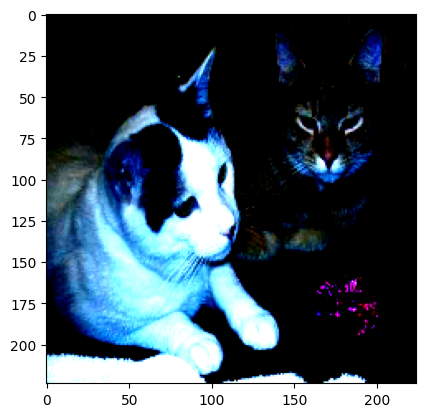

In [7]:
im, label = data[200]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [8]:
def get_model():
    model = models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
    model.classifier = nn.Sequential(nn.Flatten(),
                                     nn.Linear(512, 128),
                                     nn.ReLU(),
                                     nn.Dropout(0.2),
                                     nn.Linear(128, 1),
                                     nn.Sigmoid())
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    return model.to(device), loss_fn, optimizer

In [9]:
from torchsummary import summary
model, criterion, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

In [10]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [11]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()

In [12]:
def get_data():
    train = CatsDogs(train_data_dir)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = CatsDogs(test_data_dir)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

In [13]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
train_losses, train_accuracies = [], []
val_accuracies = []
for epoch in range(5):
    print(f" epoch {epoch + 1}/5")
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)

 epoch 1/5


In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

epochs = np.arange(5)+1
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with VGG16 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.95,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

---